In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime as dt
import os

In [2]:
print(os.getcwd())

new_dataset_streaming = pd.read_csv(os.path.join("data", "My Streaming Activity.csv"))
new_dataset_features = pd.read_csv(os.path.join("data", "Scrobble_Features.csv"))

e:\Haidar\bangkit\capstone\ML-TuneHive\model-dev


In [3]:
display(new_dataset_streaming.head())
display(new_dataset_features.head())
print("Data Information:")
print("Streaming Data Length: {}".format(len(new_dataset_streaming)), end=", ")
print("Songs Info Data Length: {}".format(len(new_dataset_features)))

,index,SongID,TimeStamp_Central,Performer,Album,Song,TimeStamp_UTC
0,0,Twenty Five MilesEdwin Starr,5/25/2021 5:18:00 PM,Edwin Starr,25 Miles,Twenty Five Miles,5/25/2021 11:18:00 PM
1,1,Devil's EyesGreyhounds,5/25/2021 5:15:00 PM,Greyhounds,Change of Pace,Devil's Eyes,5/25/2021 11:15:00 PM
2,2,Pussy and PizzaMurs,5/25/2021 5:12:00 PM,Murs,Have a Nice Life,Pussy and Pizza,5/25/2021 11:12:00 PM
3,3,Opera (feat. Method Man)King Green,5/25/2021 5:08:00 PM,King Green,Opera (feat. Method Man),Opera (feat. Method Man),5/25/2021 11:08:00 PM
4,4,Sweet PotatoMouthe,5/25/2021 5:05:00 PM,Mouthe,NUVO,Sweet Potato,5/25/2021 11:05:00 PM


,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_popularity,spotify_track_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,Hide in Your ShellSupertramp,Supertramp,Hide in Your Shell,"['album rock', 'art rock', 'classic rock', 'gl...",0ldE7rHWykc9OUViCzdviV,NaN,409889.0,51.0,False,...,7.0,-12.843,0.0,0.0429,0.471000,0.000074,0.2970,0.319,111.667,4.0
1,1,Vento k h o,o k h o,Vent,"['chillhop', 'lo-fi beats', 'phonk']",3wJTCCMHtuOdDg4fJzkd0i,https://p.scdn.co/mp3-preview/17715e8450561f32...,164935.0,54.0,False,...,10.0,-9.398,0.0,0.0783,0.513000,0.219000,0.1710,0.224,77.703,4.0
2,2,Cesaro SummabilityTool,Tool,Cesaro Summability,"['alternative metal', 'alternative rock', 'art...",6xttnk5U2VMVCaihaD0RPE,https://p.scdn.co/mp3-preview/e12b11bf6cdcdff4...,86226.0,46.0,False,...,11.0,-21.736,0.0,0.1910,0.000799,0.779000,0.0832,0.196,115.350,4.0
3,3,Dyslexic HeartPaul Westerberg,Paul Westerberg,Dyslexic Heart,"['alternative country', 'alternative pop', 'al...",6h0lrpGtRIwbBiPHthDB3o,https://p.scdn.co/mp3-preview/ab43e42aa0b89500...,271200.0,49.0,False,...,0.0,-5.064,1.0,0.0292,0.039100,0.000004,0.1280,0.843,136.575,4.0
4,4,Loan Me A DimeBoz Scaggs,Boz Scaggs,Loan Me A Dime,"['adult standards', 'album rock', 'art rock', ...",05LTrpC9z6YpTPmaeGC9kQ,https://p.scdn.co/mp3-preview/595502b0217df464...,751920.0,44.0,False,...,9.0,-10.518,0.0,0.0377,0.309000,0.057700,0.2870,0.382,139.957,4.0


Data Information:
Streaming Data Length: 62907, Songs Info Data Length: 13396


In [4]:
joined_dataset = pd.merge(new_dataset_streaming, new_dataset_features, how='inner', on='SongID')
display(joined_dataset.head(10))
print("Joined Data size:", joined_dataset.shape)

,index_x,SongID,TimeStamp_Central,Performer_x,Album,Song_x,TimeStamp_UTC,index_y,Performer_y,Song_y,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,Twenty Five MilesEdwin Starr,5/25/2021 5:18:00 PM,Edwin Starr,25 Miles,Twenty Five Miles,5/25/2021 11:18:00 PM,9761,Edwin Starr,Twenty Five Miles,...,1.0,-7.376,1.0,0.0607,0.0595,0.000015,0.2240,0.964,124.567,4.0
1,1,Devil's EyesGreyhounds,5/25/2021 5:15:00 PM,Greyhounds,Change of Pace,Devil's Eyes,5/25/2021 11:15:00 PM,206,Greyhounds,Devil's Eyes,...,8.0,-7.913,0.0,0.0456,0.3540,0.000414,0.0974,0.858,113.236,4.0
2,2,Pussy and PizzaMurs,5/25/2021 5:12:00 PM,Murs,Have a Nice Life,Pussy and Pizza,5/25/2021 11:12:00 PM,6404,Murs,Pussy and Pizza,...,5.0,-7.123,1.0,0.0659,0.0708,0.000004,0.0780,0.381,93.991,4.0
3,8,Our Special PlaceThe Heavy,5/25/2021 4:46:00 PM,The Heavy,Great Vengeance and Furious Fire,Our Special Place,5/25/2021 10:46:00 PM,6205,The Heavy,Our Special Place,...,2.0,-5.173,1.0,0.0386,0.2720,0.003610,0.0991,0.939,193.996,4.0
4,10,Make Peace and be FreePerfect Confusion,5/25/2021 4:39:00 PM,Perfect Confusion,Perfect Confusion,Make Peace and be Free,5/25/2021 10:39:00 PM,6051,Perfect Confusion,Make Peace and be Free,...,6.0,-6.943,1.0,0.0315,0.0138,0.000017,0.0649,0.431,78.037,4.0
5,11,Put It In The BoogieZach Deputy,5/25/2021 4:35:00 PM,Zach Deputy,Wash It in the Water,Put It In The Boogie,5/25/2021 10:35:00 PM,1084,Zach Deputy,Put It In The Boogie,...,2.0,-4.242,1.0,0.1100,0.0235,0.436000,0.1710,0.674,110.015,4.0
6,12,Saving GraceTom Petty,5/25/2021 3:59:00 PM,Tom Petty,Highway Companion,Saving Grace,5/25/2021 9:59:00 PM,8984,Tom Petty,Saving Grace,...,2.0,-4.230,1.0,0.0381,0.1370,0.000269,0.1300,0.791,142.287,4.0
7,25,Saving GraceTom Petty,5/25/2021 12:49:00 PM,Tom Petty,Highway Companion,Saving Grace,5/25/2021 6:49:00 PM,8984,Tom Petty,Saving Grace,...,2.0,-4.230,1.0,0.0381,0.1370,0.000269,0.1300,0.791,142.287,4.0
8,26,ParalyzerFinger Eleven,5/25/2021 12:46:00 PM,Finger Eleven,Them vs. You vs. Me (Deluxe Edition),Paralyzer,5/25/2021 6:46:00 PM,6109,Finger Eleven,Paralyzer,...,11.0,-3.486,0.0,0.0456,0.1570,0.000000,0.2330,0.861,106.031,4.0
9,27,StopPink Floyd,5/25/2021 12:45:00 PM,Pink Floyd,The Wall,Stop,5/25/2021 6:45:00 PM,1532,Pink Floyd,Stop,...,9.0,-29.867,0.0,0.0432,0.9170,0.001360,0.0658,0.309,76.112,4.0


Joined Data size: (54501, 28)


## Remove NAN values

In [9]:
joined_dataset = joined_dataset[~joined_dataset['spotify_genre'].isna()]

In [11]:
joined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50018 entries, 0 to 54500
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index_x                    50018 non-null  int64  
 1   SongID                     50018 non-null  object 
 2   TimeStamp_Central          50018 non-null  object 
 3   Performer_x                50018 non-null  object 
 4   Album                      47890 non-null  object 
 5   Song_x                     50018 non-null  object 
 6   TimeStamp_UTC              50018 non-null  object 
 7   index_y                    50018 non-null  int64  
 8   Performer_y                50018 non-null  object 
 9   Song_y                     50018 non-null  object 
 10  spotify_genre              50018 non-null  object 
 11  spotify_track_id           50018 non-null  object 
 12  spotify_track_preview_url  36001 non-null  object 
 13  spotify_track_duration_ms  50018 non-null  float64


In [12]:
def convert_dataset_to_session(df, timestamp_column):
    manipulated_df = df.copy()
    
    # convert to datetime
    manipulated_df[timestamp_column] = pd.to_datetime(manipulated_df[timestamp_column], format='%m/%d/%Y %I:%M:%S %p')
    
    # group them to session
    manipulated_df['session_3_hour'] = manipulated_df[timestamp_column].dt.floor('3H')
    manipulated_df['session_id'] = manipulated_df['session_3_hour'].astype('category').cat.codes
    return manipulated_df

def convert_dataset_to_session_2point0(df, timestamp_column):
    manipulated_df = df.copy()
    
    # Convert to datetime
    manipulated_df[timestamp_column] = pd.to_datetime(manipulated_df[timestamp_column], format='%m/%d/%Y %I:%M:%S %p')
    
    # Group them into sessions
    manipulated_df['session_3_hour'] = manipulated_df[timestamp_column].dt.floor('3H')
    manipulated_df['session_id'] = manipulated_df['session_3_hour'].astype('category').cat.codes

    # Identify sessions with only one element
    session_counts = manipulated_df['session_id'].value_counts()
    single_sessions = session_counts[session_counts == 1].index.tolist()

    # Combine single session with the nearest session
    for session_id in single_sessions:
        # Get the timestamp of the session with one element
        single_session_timestamp = manipulated_df[manipulated_df['session_id'] == session_id][timestamp_column].iloc[0]

        # Find the nearest session
        nearest_session = manipulated_df[manipulated_df['session_id'] != session_id].iloc[
            (manipulated_df[timestamp_column] - single_session_timestamp).abs().argmin()]

        nearest_session_id = nearest_session['session_id']
        
        # Find the rows for the single session and nearest session
        single_session_row = manipulated_df[manipulated_df['session_id'] == session_id]
        nearest_session_row = manipulated_df[manipulated_df['session_id'] == nearest_session_id]
        
        # Combine the two sessions by appending the nearest session's row to the single session
        combined_session = pd.concat([single_session_row, nearest_session_row]).drop_duplicates()
        
        # Update the session_id for the combined session to be the same
        manipulated_df.loc[manipulated_df['session_id'] == session_id, 'session_id'] = nearest_session_id
        
    return manipulated_df

# Assuming joined_dataset is your DataFrame
session_df = convert_dataset_to_session_2point0(joined_dataset, 'TimeStamp_UTC')
session_df.head()


# session_df = convert_dataset_to_session(joined_dataset, 'TimeStamp_UTC')
# session_df.head()

C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_16292\4018918137.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  manipulated_df['session_3_hour'] = manipulated_df[timestamp_column].dt.floor('3H')


,index_x,SongID,TimeStamp_Central,Performer_x,Album,Song_x,TimeStamp_UTC,index_y,Performer_y,Song_y,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,session_3_hour,session_id
0,0,Twenty Five MilesEdwin Starr,5/25/2021 5:18:00 PM,Edwin Starr,25 Miles,Twenty Five Miles,2021-05-25 23:18:00,9761,Edwin Starr,Twenty Five Miles,...,1.0,0.0607,0.0595,0.000015,0.2240,0.964,124.567,4.0,2021-05-25 21:00:00,4332
1,1,Devil's EyesGreyhounds,5/25/2021 5:15:00 PM,Greyhounds,Change of Pace,Devil's Eyes,2021-05-25 23:15:00,206,Greyhounds,Devil's Eyes,...,0.0,0.0456,0.3540,0.000414,0.0974,0.858,113.236,4.0,2021-05-25 21:00:00,4332
2,2,Pussy and PizzaMurs,5/25/2021 5:12:00 PM,Murs,Have a Nice Life,Pussy and Pizza,2021-05-25 23:12:00,6404,Murs,Pussy and Pizza,...,1.0,0.0659,0.0708,0.000004,0.0780,0.381,93.991,4.0,2021-05-25 21:00:00,4332
3,8,Our Special PlaceThe Heavy,5/25/2021 4:46:00 PM,The Heavy,Great Vengeance and Furious Fire,Our Special Place,2021-05-25 22:46:00,6205,The Heavy,Our Special Place,...,1.0,0.0386,0.2720,0.003610,0.0991,0.939,193.996,4.0,2021-05-25 21:00:00,4332
4,10,Make Peace and be FreePerfect Confusion,5/25/2021 4:39:00 PM,Perfect Confusion,Perfect Confusion,Make Peace and be Free,2021-05-25 22:39:00,6051,Perfect Confusion,Make Peace and be Free,...,1.0,0.0315,0.0138,0.000017,0.0649,0.431,78.037,4.0,2021-05-25 21:00:00,4332


3997
Session Length Statistics:
count    3997.000000
mean       12.513885
std         9.145423
min         2.000000
25%         5.000000
50%        10.000000
75%        18.000000
max       119.000000
dtype: float64


,index,count
0,5,271
1,3,258
2,4,248
3,7,242
4,2,240
5,6,236
6,9,207
7,8,203
8,10,171
9,11,169


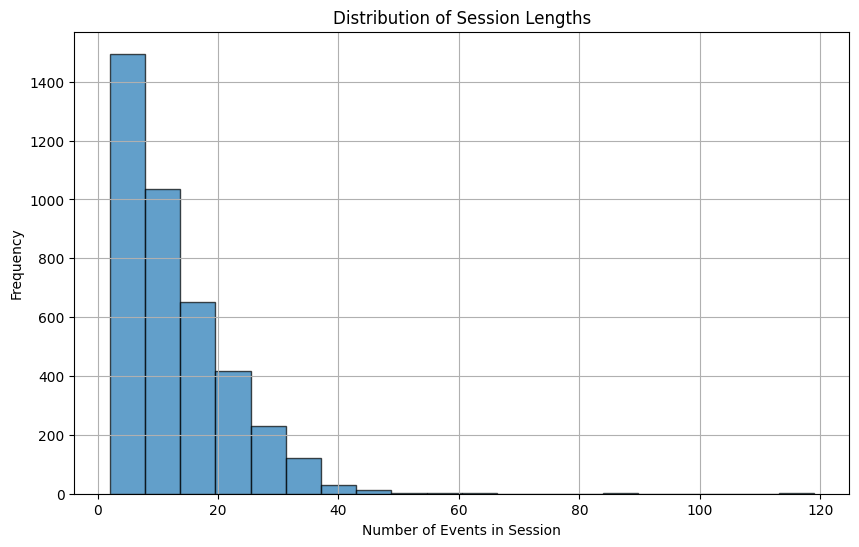

In [13]:
# n_cols = 10
# for i in range(len(session_df['session_id'].unique()/n_cols)):
#     for j in range(n_cols):
        
print(len(session_df['session_id'].unique()))

# Group the data by session_id and calculate the size of each session
session_lengths = session_df.groupby('session_id').size()

# Print basic statistics about the session lengths
print("Session Length Statistics:")
print(session_lengths.describe())
display(session_lengths.value_counts().reset_index())

# Plot the distribution of session lengths
plt.figure(figsize=(10, 6))
plt.hist(session_lengths, bins=20, edgecolor='black', alpha=0.7)
plt.title("Distribution of Session Lengths")
plt.xlabel("Number of Events in Session")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## Convert DataFrame to csv

In [14]:
try:
    session_df.to_csv("./data/session-data.csv", index=False)
    print("Save successful")
except Exception as e:
    print(e)

Save successful
